# `House-price prediction using Advanced Regression` - Madhavan Rangarajan


## Importing basic libraries used for Data Manipulation and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

## Loading our dataset and taking a look at head, shape, info of the dataframe 

In [2]:
house = pd.read_csv('train 5.59.04 PM.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
init_shape = copy.deepcopy(house.shape)
init_shape

(1460, 81)

## Lets visualize how the null values are distributed across the data

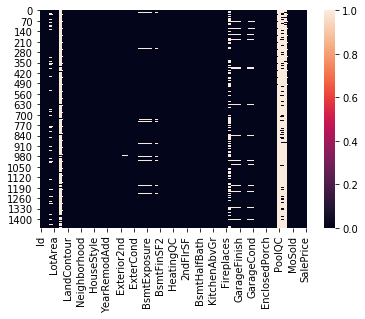

In [5]:
sns.heatmap(house.isnull())

### Lets check the percenatage of missing values in each column

In [6]:
missing = house.isnull().mean() * 100
missing.sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

### Lets consider all the columns which has above 10% missing values

In [7]:
above_10 = missing[missing > 10]
above_10

LotFrontage    17.739726
Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

### All the columns except 'LotFrontage' are actegorical columns which has null values which actually represents that the housing doesnot have those attributes respectively. So, lets convert null values to 'not present'

In [8]:
house[above_10.index] = house[above_10.index].replace(np.nan,'Not present')
missing = house.isnull().mean() * 100
del house['LotFrontage']

### Lets take a look at other columns whuch has low missing values

In [9]:
below_10 = missing[missing <= 10].sort_values(ascending = False)[:13]
below_10

GarageYrBlt     5.547945
GarageCond      5.547945
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

## All garage columns except 'GarageYrBlt' are categorical columns and the missing values in these columns actually represent that the property doesnot have a garage. So,lets replace all the null values in these columns with 'No Garage'

In [10]:
house[house[below_10.index].filter(like = 'Garage').select_dtypes(object).columns] = house[below_10.index].filter(like = 'Garage').select_dtypes(object).replace(np.nan,'No Garage')



### Lets check the missing values again

In [11]:
missing = house.isnull().mean() * 100
below_10 = missing[missing <= 10].sort_values(ascending = False)[:13]
below_10

GarageYrBlt     5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
ExterQual       0.000000
RoofMatl        0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
dtype: float64

### The null values in the bsmt columns represent that the property doesnot have a basement.So,lets replace these with 'No Basement'

In [12]:
house[house[below_10.index].filter(like = 'Bsmt').columns] = house[below_10.index].filter(like = 'Bsmt').replace(np.nan,'No Basement')

In [13]:
missing = house.isnull().mean() * 100
below_10 = missing[missing > 0].sort_values(ascending = False)
below_10

GarageYrBlt    5.547945
MasVnrArea     0.547945
MasVnrType     0.547945
Electrical     0.068493
dtype: float64

## Lets replace MasVnr with a dummy as it is present or not where 1 represent it is present and 0 it is not

In [14]:
house['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [15]:
house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
house['Venner_present'] = house['MasVnrType'].map({'None': 0}).replace(np.nan,1)
del house['MasVnrType']
del house['MasVnrArea']

In [17]:
missing = house.isnull().mean() * 100
below_10 = missing[missing > 0].sort_values(ascending = False)
below_10

GarageYrBlt    5.547945
Electrical     0.068493
dtype: float64

### Very minimal data is missing in 'Electrical'. Lets drop those rows with 'null values'

In [18]:
house = house.loc[house['Electrical'].dropna().index]
missing = house.isnull().mean() * 100
below_10 = missing[missing > 0].sort_values(ascending = False)
below_10

GarageYrBlt    5.551748
dtype: float64

### 'Lets' check the year columns

In [19]:
house.filter(like = 'Year').describe()

,YearBuilt,YearRemodAdd
count,1459.000000,1459.000000
mean,1971.244003,1984.850583
std,30.199555,20.644343
min,1872.000000,1950.000000
25%,1954.000000,1967.000000
50%,1973.000000,1994.000000
75%,2000.000000,2004.000000
max,2010.000000,2010.000000


### There are 4 year columns with Max as '2010' . So lets convert all these columns as 'age' with respect to 2010"

In [20]:
house[house.filter(like = 'Year').columns] = house.filter(like = 'Year').apply(lambda x:x.map(lambda y:2010 - y))
house[house.filter(like = 'Yr').columns] = house.filter(like = 'Yr').apply(lambda x:x.map(lambda y:2010 - y))


### As 'GarageYrBlt' is a important continuous variable and as a fact that 5% values are missing in it indicate houses with no garage ,lets convert the continuous variable into dummies based on quantile values and then label null entries as subcategory named 'No Garage'

In [21]:
house['Garage_age_quant'] = pd.qcut(house['GarageYrBlt'],q = [x/10 for x in range(1,11)],labels = ['Quant_' + str(x) for x in range(1,10)])
del house['GarageYrBlt']
house['Garage_age_quant'] = house['Garage_age_quant'].replace(np.nan,'No Garage')






## Lets verify the number of columns with missing entries

In [22]:
house.isnull().any().sum()

0

### Lets save the unique values in each numerical column and then work on categorical columns

In [23]:
cont = house.select_dtypes([int,float]).nunique()

In [24]:
unique = house.select_dtypes(object).nunique()
unique

MSZoning             5
Street               2
Alley                3
LotShape             4
LandContour          4
Utilities            2
LotConfig            5
LandSlope            3
Neighborhood        25
Condition1           9
Condition2           8
BldgType             5
HouseStyle           8
RoofStyle            6
RoofMatl             8
Exterior1st         15
Exterior2nd         16
ExterQual            4
ExterCond            5
Foundation           6
BsmtQual             5
BsmtCond             5
BsmtExposure         5
BsmtFinType1         7
BsmtFinType2         7
Heating              6
HeatingQC            5
CentralAir           2
Electrical           5
KitchenQual          4
Functional           7
FireplaceQu          6
GarageType           7
GarageFinish         4
GarageQual           6
GarageCond           6
PavedDrive           3
PoolQC               4
Fence                5
MiscFeature          5
SaleType             9
SaleCondition        6
Garage_age_quant    10
dtype: int6

## We can see that there are many categorical columns but most of the columns have high number of 'sub-categories' in it. Let's plot few of the categorical columns as % contribution of each sub-category to check if we can merge few sub-categories

Text(0.5, 0.98, '% contribution of sub-categories to each categorical column')

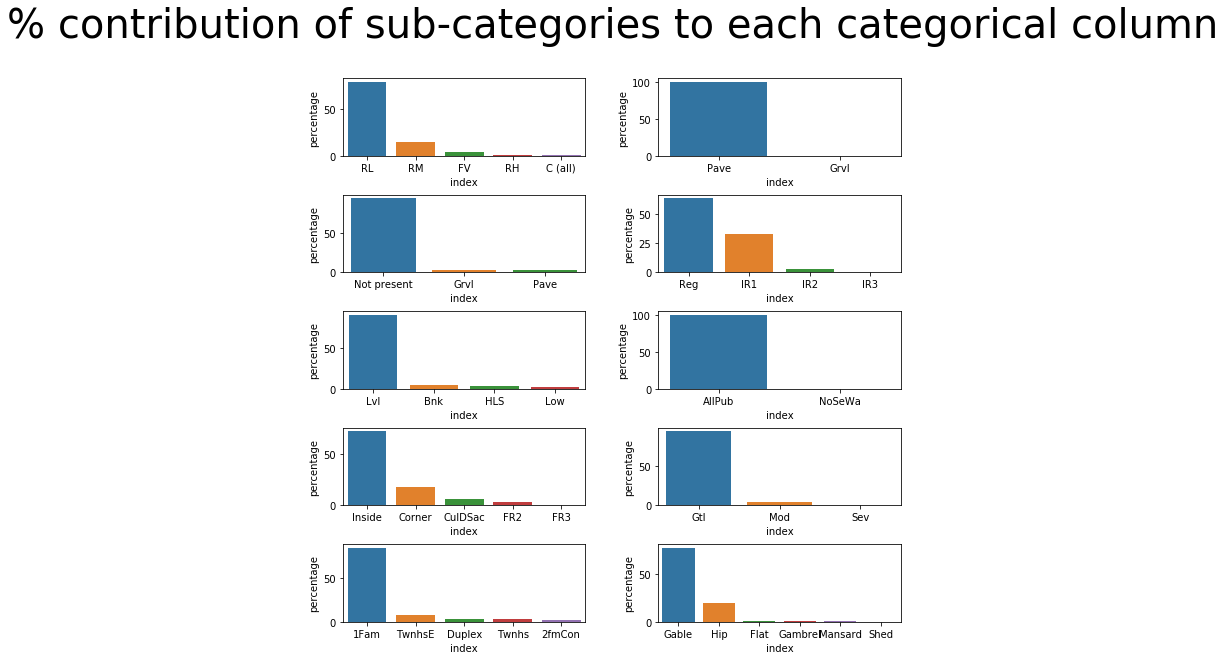

In [25]:
# univariate categorical

plt.figure(figsize= (10,10))
c = 1
for x in unique[unique < 7].index[:10]:
    plt.subplot(5,2,c)
    sav = house[x].value_counts(normalize  = True).rename('percentage').mul(100).reset_index()
    sns.barplot(y = 'percentage' , x = 'index' , data = sav)
    c +=1 
plt.subplots_adjust(wspace= 0.3 , hspace = 0.5)
plt.suptitle('% contribution of sub-categories to each categorical column' , size = 40 )
    

# `We have seen that many sub-categories take very small % in each category which will be less significant in explaining the variance in target variable. So, for each category lets merge all those sub-categories which takes up less than 10% values in total `

In [26]:
for x in unique.index:
    temp = house[x].value_counts(normalize  = True) * 100
    house[x][house[x].isin(temp[temp  < 10].index)] = 'Other'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Lets check the unique values of categorical columns now

In [27]:
unique = house.select_dtypes(object).nunique()
unique

MSZoning            3
Street              2
Alley               2
LotShape            3
LandContour         2
Utilities           2
LotConfig           3
LandSlope           2
Neighborhood        3
Condition1          2
Condition2          2
BldgType            2
HouseStyle          4
RoofStyle           3
RoofMatl            2
Exterior1st         5
Exterior2nd         5
ExterQual           3
ExterCond           3
Foundation          4
BsmtQual            3
BsmtCond            2
BsmtExposure        3
BsmtFinType1        5
BsmtFinType2        2
Heating             2
HeatingQC           4
CentralAir          2
Electrical          2
KitchenQual         3
Functional          2
FireplaceQu         4
GarageType          3
GarageFinish        4
GarageQual          2
GarageCond          2
PavedDrive          2
PoolQC              2
Fence               3
MiscFeature         2
SaleType            2
SaleCondition       2
Garage_age_quant    4
dtype: int64

### Lets check the columns which has two unique values first

In [28]:
two_unique = house.loc[:,unique[unique == 2].index]
two_unique.head()

,Street,Alley,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,RoofMatl,BsmtCond,...,CentralAir,Electrical,Functional,GarageQual,GarageCond,PavedDrive,PoolQC,MiscFeature,SaleType,SaleCondition
0,Pave,Not present,Lvl,AllPub,Gtl,Norm,Norm,1Fam,CompShg,TA,...,Y,SBrkr,Typ,TA,TA,Y,Not present,Not present,WD,Normal
1,Pave,Not present,Lvl,AllPub,Gtl,Other,Norm,1Fam,CompShg,TA,...,Y,SBrkr,Typ,TA,TA,Y,Not present,Not present,WD,Normal
2,Pave,Not present,Lvl,AllPub,Gtl,Norm,Norm,1Fam,CompShg,TA,...,Y,SBrkr,Typ,TA,TA,Y,Not present,Not present,WD,Normal
3,Pave,Not present,Lvl,AllPub,Gtl,Norm,Norm,1Fam,CompShg,Other,...,Y,SBrkr,Typ,TA,TA,Y,Not present,Not present,WD,Other
4,Pave,Not present,Lvl,AllPub,Gtl,Norm,Norm,1Fam,CompShg,TA,...,Y,SBrkr,Typ,TA,TA,Y,Not present,Not present,WD,Normal


## Let's create dummies for all these columns

In [29]:
for x in two_unique.columns: #looping on columns
    dum = pd.get_dummies(two_unique[x] , prefix = str(x))
    dum = dum[dum.columns.difference([dum.sum().sort_values().index[0]])]
    two_unique = pd.concat([two_unique,dum] , axis = 1)
    del two_unique[x]

## Let's check the imbalance % so we can remove insignificant variables

In [30]:
yes_no_count = pd.DataFrame()
for col in two_unique.columns: #converted is the target column(we dont need to check for it)
    yes_no_count = pd.concat([yes_no_count,two_unique.filter(like = col).iloc[:,0].value_counts().to_frame().T])
    

yes_no_count['%_imbalance'] = 100 - two_unique.mean() * 100

yes_no_count

,1,0,%_imbalance
Street_Pave,1453,6,0.411241
Alley_Not present,1368,91,6.237149
LandContour_Lvl,1310,149,10.212474
Utilities_AllPub,1458,1,0.068540
LandSlope_Gtl,1381,78,5.346127
Condition1_Norm,1259,200,13.708019
Condition2_Norm,1444,15,1.028101
BldgType_1Fam,1219,240,16.449623
RoofMatl_CompShg,1433,26,1.782042
BsmtCond_TA,1310,149,10.212474


### Lets remove all the columns which are highly imbalanced and check the remaining

In [31]:
two_unique = two_unique[two_unique.columns.difference(yes_no_count[yes_no_count['%_imbalance'] < 10].index)]
two_unique.head()

,BldgType_1Fam,BsmtCond_TA,BsmtFinType2_Unf,Condition1_Norm,GarageQual_TA,LandContour_Lvl,SaleCondition_Normal,SaleType_WD
0,1,1,1,1,1,1,1,1
1,1,1,1,0,1,1,1,1
2,1,1,1,1,1,1,1,1
3,1,0,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1


In [32]:
house = house[house.columns.difference(unique[unique == 2].index)]
house[two_unique.columns] = two_unique



## Lets check other categorical columns and create dummies for these also

In [33]:
unique = house.select_dtypes(object).nunique()
unique

BsmtExposure        3
BsmtFinType1        5
BsmtQual            3
ExterCond           3
ExterQual           3
Exterior1st         5
Exterior2nd         5
Fence               3
FireplaceQu         4
Foundation          4
GarageFinish        4
GarageType          3
Garage_age_quant    4
HeatingQC           4
HouseStyle          4
KitchenQual         3
LotConfig           3
LotShape            3
MSZoning            3
Neighborhood        3
RoofStyle           3
dtype: int64

In [34]:
for x in unique.index: #looping on columns
    dum = pd.get_dummies(house[x] , prefix = str(x))
    dum = dum[dum.columns.difference([dum.sum().sort_values().index[0]])]
    house = pd.concat([house,dum] , axis = 1)
    del house[x]

### Lets verify our final dataframe

In [35]:
house.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LotConfig_Corner,LotConfig_Inside,LotShape_IR1,LotShape_Reg,MSZoning_RL,MSZoning_RM,Neighborhood_NAmes,Neighborhood_Other,RoofStyle_Gable,RoofStyle_Hip
0,856,854,0,3,706,0,1,0,150,0,...,0,1,0,1,1,0,0,0,1,0
1,1262,0,0,3,978,0,0,1,284,0,...,0,0,0,1,1,0,0,1,1,0
2,920,866,0,3,486,0,1,0,434,0,...,0,1,1,0,1,0,0,0,1,0
3,961,756,0,3,216,0,1,0,540,272,...,1,0,1,0,1,0,0,1,1,0
4,1145,1053,0,4,655,0,1,0,490,0,...,0,0,1,0,1,0,0,1,1,0


## Lets do some anaylsis with numerical features

In [36]:
del house['Id']
cont = cont[~ cont.index.isin(['Id'])]
cont

MSSubClass          15
LotArea           1072
OverallQual         10
OverallCond          9
YearBuilt          112
YearRemodAdd        61
BsmtFinSF1         637
BsmtFinSF2         144
BsmtUnfSF          780
TotalBsmtSF        721
1stFlrSF           752
2ndFlrSF           417
LowQualFinSF        24
GrLivArea          861
BsmtFullBath         4
BsmtHalfBath         3
FullBath             4
HalfBath             3
BedroomAbvGr         8
KitchenAbvGr         4
TotRmsAbvGrd        12
Fireplaces           4
GarageCars           5
GarageArea         441
WoodDeckSF         274
OpenPorchSF        202
EnclosedPorch      120
3SsnPorch           20
ScreenPorch         76
PoolArea             8
MiscVal             21
MoSold              12
YrSold               5
SalePrice          663
Venner_present       2
dtype: int64

## Lets choose few continuous features and plot its relation with our target variable 'SalePrice'

In [37]:
few_cont = cont.sort_values(ascending = False)[:8].index
few_cont

Index(['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF', 'TotalBsmtSF',
       'SalePrice', 'BsmtFinSF1', 'GarageArea'],
      dtype='object')

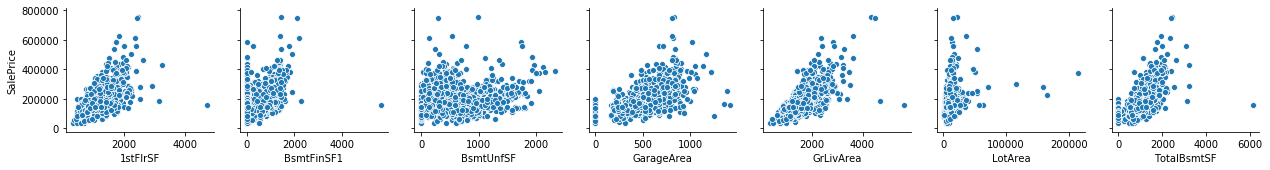

In [38]:
sns.pairplot(y_vars = ['SalePrice'] , x_vars = few_cont.difference(['SalePrice']) , data = house)

## We can observe quiet a good amount of relation with our target variable. Lets plot a heatmap to visualize the co-relation even better

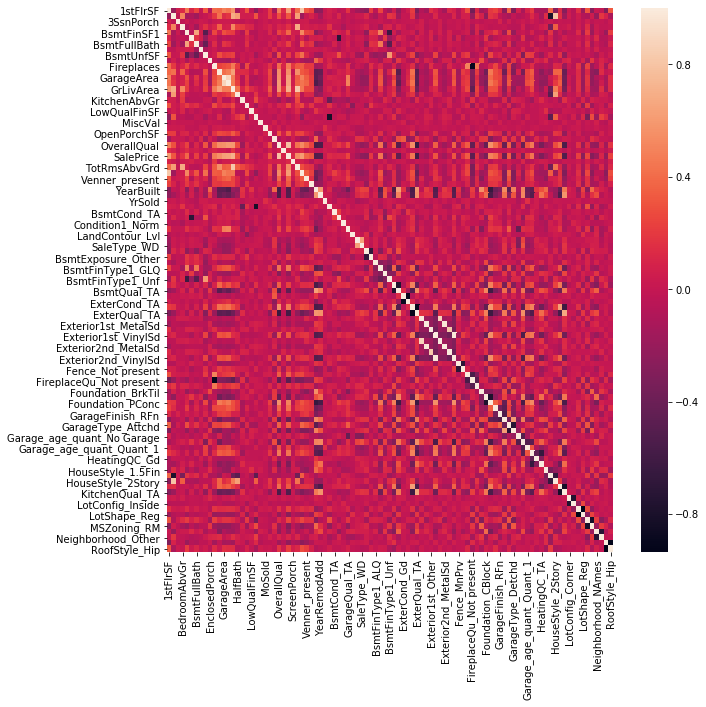

In [39]:
cor_mat = house.corr()
plt.figure(figsize = (10,10))
sns.heatmap(cor_mat)

## 'Lets check the top 10 most co-related variables with our target column'

In [40]:
top_10 = abs(cor_mat['SalePrice']).sort_values(ascending = False)[1:][:10].rename('Top 10 co-relations with Target Column').to_frame()
top_10

,Top 10 co-relations with Target Column
OverallQual,0.791069
GrLivArea,0.708618
GarageCars,0.640473
GarageArea,0.623423
TotalBsmtSF,0.613905
1stFlrSF,0.605968
ExterQual_TA,0.589082
FullBath,0.560881
TotRmsAbvGrd,0.533779
YearBuilt,0.523273


# Modelling

In [41]:
y = house.pop('SalePrice')
X = house

## Lets check the distribution of our target column to verify the normality assumption

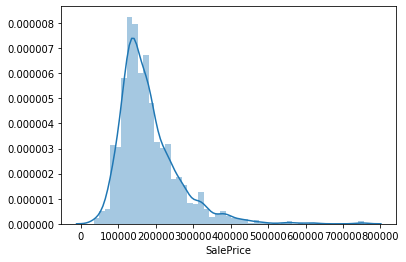

In [42]:
sns.distplot(y)

## We can see that the distribution is skewed. Lets do logarithmic transformation and check if we can change it to normal 

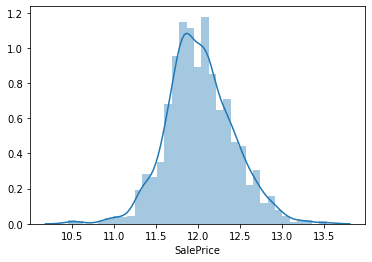

In [43]:
sns.distplot(np.log(y))

In [44]:
y = np.log(y)

## Lets convert all our dependendent variables in the same scale.Lets use normalization here

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X[X.columns] = scaler.fit_transform(X)

### Train - test split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Lets import the necessary libraries. For building model using ridge and lasso regression we need to choose the value of alpha which indicates on which extent we penalize the model to reduce model complexity. For this we use cross validation and GridSearchCv. Lets build the model 

## `As our goal is also to see which variables influence the price of the house it is a better strategy to use RFE to pick top 10 features and use those features for building model using 'ridge regression'

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.10,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0,5.0,6.0,7.0 ]}



lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 10)
rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_rid = X_train[col]


ridge = Ridge()


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rid, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

## Lets see the results of our gridsearchcv

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002170,0.000852,0.000838,0.000120,0.0001,{'alpha': 0.0001},-0.038820,-0.019258,-0.021862,-0.061912,...,-0.031914,0.016781,20,-0.023022,-0.024003,-0.023466,-0.016300,-0.024320,-0.022222,0.002995
1,0.001694,0.000180,0.000749,0.000099,0.001,{'alpha': 0.001},-0.038768,-0.019258,-0.021864,-0.061902,...,-0.031902,0.016773,19,-0.023022,-0.024003,-0.023466,-0.016300,-0.024320,-0.022222,0.002995
2,0.001546,0.000210,0.000695,0.000061,0.01,{'alpha': 0.01},-0.038265,-0.019260,-0.021883,-0.061804,...,-0.031789,0.016693,18,-0.023023,-0.024003,-0.023467,-0.016300,-0.024320,-0.022222,0.002995
3,0.001506,0.000138,0.000705,0.000026,0.05,{'alpha': 0.05},-0.036229,-0.019272,-0.021968,-0.061375,...,-0.031324,0.016377,17,-0.023034,-0.024005,-0.023468,-0.016301,-0.024321,-0.022226,0.002995
4,0.001499,0.000224,0.000743,0.000063,0.1,{'alpha': 0.1},-0.034073,-0.019291,-0.022074,-0.060855,...,-0.030825,0.016052,16,-0.023064,-0.024009,-0.023471,-0.016306,-0.024325,-0.022235,0.002996


## Choosing 'alpha' for ridge regression

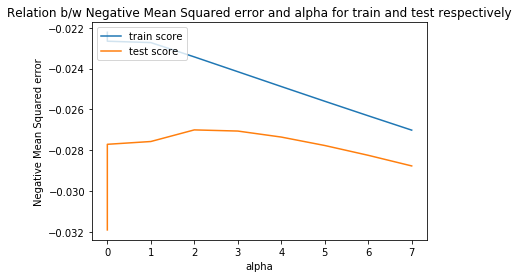

In [49]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared error')
plt.title('Relation b/w Negative Mean Squared error and alpha for train and test respectively')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## Lets check the best alpha value

In [50]:
model_cv.best_params_['alpha']

2.0

## Lets now build the model using 'ridge' and check its co-efficients

In [51]:
best = model_cv.best_params_['alpha']
ridge = Ridge(alpha = best)

ridge.fit(X_train_rid, y_train)
ridge.coef_

array([ 0.20265759,  0.20460901,  0.37500579,  1.01259631,  0.29015054,
        0.40857999,  0.78263448, -0.18901568,  0.46179119, -0.45969458])

## Lets now verify the r-squared of train and test set . As the main motive of ridge regression is to reduce model complexity and generalize unseen data very well the r-squared must of the train must be very close to that of test which indicates the model is not overfitted. Lets check it

In [52]:
from sklearn import metrics
y_train_pred = ridge.predict(X_train_rid)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test[X_train_rid.columns])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.851123769752389
0.8470951626041606


## `Lets check the co-efficients generated through the model so that we can check which variables are significant in predicting the price of a house and how well those variables describe the price of a house.`

 

In [53]:
ridge_model = pd.DataFrame()
ridge_model['Co-efficients'] = ridge.coef_
ridge_model.index = X_train_rid.columns
ridge_model = ridge_model[ridge_model['Co-efficients'] != 0]
ridge_model.sort_values(by = 'Co-efficients' , ascending = False)

,Co-efficients
GrLivArea,1.012596
OverallQual,0.782634
TotalBsmtSF,0.461791
OverallCond,0.408580
GarageCars,0.375006
LotArea,0.290151
Fireplaces,0.204609
BsmtFullBath,0.202658
PoolArea,-0.189016
YearBuilt,-0.459695


## Lets follow the same process for Lasso Regression but lets use 15 features in Rfe because by nature 'lasso' penalizes co-efficients very high and therefore acts as a .means of feature selection. Also, as penalization is heavy here lets use smaller set of params of 'alpha' 

In [54]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002,0.0005, 0.001 ,0.002,0.005]}



lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 15)
rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_lasso = X_train[col]
# cross validation

model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.002,
                                   0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002140,0.000496,0.000740,0.000057,0.0001,{'alpha': 0.0001},-0.031360,-0.020234,-0.022420,-0.056553,...,-0.029449,0.014378,5,-0.021802,-0.022060,-0.021648,-0.015539,-0.022819,-0.020774,0.002648
1,0.002090,0.000194,0.000855,0.000105,0.0002,{'alpha': 0.0002},-0.028650,-0.020268,-0.022687,-0.055851,...,-0.028880,0.014001,4,-0.021879,-0.022114,-0.021685,-0.015573,-0.022871,-0.020824,0.002657
2,0.001873,0.000283,0.000754,0.000148,0.0005,{'alpha': 0.0005},-0.022060,-0.020613,-0.023551,-0.053745,...,-0.027550,0.013219,3,-0.022413,-0.022452,-0.021950,-0.015737,-0.023168,-0.021144,0.002731
3,0.002153,0.000211,0.000783,0.000081,0.001,{'alpha': 0.001},-0.016154,-0.021374,-0.024845,-0.050638,...,-0.026330,0.012479,1,-0.023997,-0.023060,-0.022584,-0.016316,-0.023683,-0.021928,0.002849
4,0.002071,0.000382,0.000752,0.000119,0.002,{'alpha': 0.002},-0.016802,-0.022957,-0.026859,-0.045790,...,-0.026625,0.010111,2,-0.025619,-0.024272,-0.023593,-0.017599,-0.024892,-0.023195,0.002877


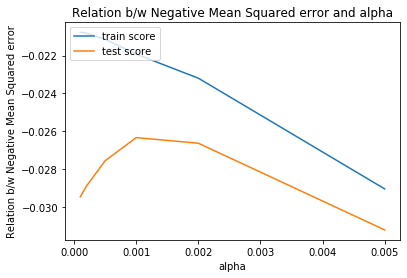

In [56]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Relation b/w Negative Mean Squared error')

plt.title("Relation b/w Negative Mean Squared error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Lets check the optimal value of alpha for lasso regression

In [57]:
model_cv1.best_params_['alpha']

0.001

## Building a model using lasso with optimal value of alpha

In [58]:
alpha = model_cv1.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Lets check the outputed co-efficients

In [59]:
lasso.coef_

array([ 0.        ,  0.23942545,  0.17001975,  0.12035749,  0.32322522,
        1.07995085,  0.        , -0.14080977,  0.35382588,  0.82580524,
       -0.        ,  0.07681972,  0.19497123,  0.09893251, -0.42047159])

In [60]:
print("Number of non-zero coff.: {}".format(np.sum(lasso.coef_!=0)))

Number of non-zero coff.: 12


## Lets see the r-squared of train and test set 

In [61]:
from sklearn import metrics
y_train_pred = lasso.predict(X_train_lasso)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test[X_train_lasso.columns])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8586065529604977
0.850610466632574


## Lets check the co-efficients generated through the model so that we can check which variables are significant in predicting the price of a house and how well those variables describe the price of a house.

In [62]:
lasso_model = pd.DataFrame()
lasso_model['Co-efficients'] = lasso.coef_
lasso_model.index = X_train_lasso.columns
lasso_model = lasso_model[lasso_model['Co-efficients'] != 0]
lasso_model.sort_values(by = 'Co-efficients' , ascending = False)

,Co-efficients
GrLivArea,1.079951
OverallQual,0.825805
OverallCond,0.353826
GarageCars,0.323225
BsmtFullBath,0.239425
TotalBsmtSF,0.194971
Fireplaces,0.170020
FullBath,0.120357
WoodDeckSF,0.098933
ScreenPorch,0.076820



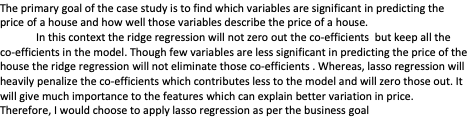